In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [2]:
image = np.array(Image.open('granma.jpg')) #load the image

In [3]:
input_file='granma.jpg'
output_file='Result.jpg'
clicks = np.zeros((4,2),np.int)## set some parametres
count = 0
A=np.zeros((8,8))

In [4]:
def mousePoints(event,x,y,flags,params):##take the first 4 clicks from user
    global count
    if event == cv2.EVENT_LBUTTONDOWN:
        if(count<4):
            clicks[count] = x,y
            count = count + 1
            
        print(clicks)

In [5]:
img = np.array(Image.open(input_file))# load the picture

cv2.namedWindow("Original Image ", cv2.WINDOW_NORMAL)
cv2.setMouseCallback("Original Image ", mousePoints)# set listener to mousePoints to save the clicks

while (count<4):
    
    cv2.imshow("Original Image ", img)#print the picture 
    cv2.waitKey(1)

cv2.destroyAllWindows()## stop render the picture when user has clicked 4 times




[[581 493]
 [  0   0]
 [  0   0]
 [  0   0]]
[[ 581  493]
 [1514  489]
 [   0    0]
 [   0    0]]
[[ 581  493]
 [1514  489]
 [1523 1098]
 [   0    0]]
[[ 581  493]
 [1514  489]
 [1523 1098]
 [ 336  949]]


In [6]:
width, height = 1000,1000 ## set dimensions for the new photo

b=np.float32([0,0,width,0,0,height,width,height])## set b 

def set_order(clicks): # set the right order to user's clicks in order to have right transformtion
    clicks_order=[]
    x_order=sorted(clicks,key=lambda x: x[0])
    l_up=min(x_order[0:2],key=lambda x: x[1])
    l_down=max(x_order[0:2],key=lambda x: x[1])
    r_up=min(x_order[2:4],key=lambda y: y[1])
    r_down=max(x_order[2:4],key=lambda y: y[1])
    clicks_order.append(l_up)
    clicks_order.append(r_up)
    clicks_order.append(l_down)
    clicks_order.append(r_down)
    
    return  clicks_order

circle=set_order(clicks)

for i in range(0,8,2): ## create A array

     A[i,0]=circle[i//2][0]## set first line in A for xi,yi point
     A[i,1]=circle[i//2][1]
     A[i,2]=1
     A[i,6]=(-1)*circle[i//2][0]*b[i]
     A[i,7]=(-1)*circle[i//2][1]*b[i]
     
     A[i+1,3]=circle[i//2][0]## set second line in A for xi,yi point
     A[i+1,4]=circle[i//2][1]
     A[i+1,5]=1
     A[i+1,6]=(-1)*circle[i//2][0]*b[i+1]
     A[i+1,7]=(-1)*circle[i//2][1]*b[i+1]
     


In [7]:
A_inverse=inv(A)# create theinverse A

x=A_inverse @ b # find the a1,a2,..,a8

provolikos=np.zeros((3,3))
count=0
for i in range(3):
     for j in range(3):
          if(i==2 and j==2):
               provolikos[i,j]=1
          else:
               provolikos[i,j]=x[count]## create the 3x3 tranformation matrix for perspective transform
               count+=1

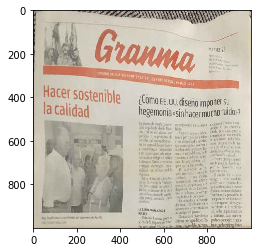

In [8]:
imgOutput = cv2.warpPerspective(img,provolikos,(width,height))## transform the image
plt.imshow(imgOutput, cmap="gray")
plt.show()## print the new image

imgOutput = np.uint8(imgOutput)
Image.fromarray(imgOutput).save(output_file)##save the new image
